This model aims at analysing whether or not the movie time duration has declined over the years

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data
Dataset used is taken from kaggle datasets : netflix_data


In [12]:
netflix_df = pd.read_csv("datasets/netflix_data.csv")
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


### Filtering data
We find the data contains Tv shows as well(from type column in the section)
so we filter data to get only movies data.
Further filtering it to get only desired columns

In [13]:
netflix_movies = netflix_df[netflix_df['type']=='Movie']
netflix_movies = netflix_movies.loc[:,['title','country','genre','release_year','duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


### Visualising the data

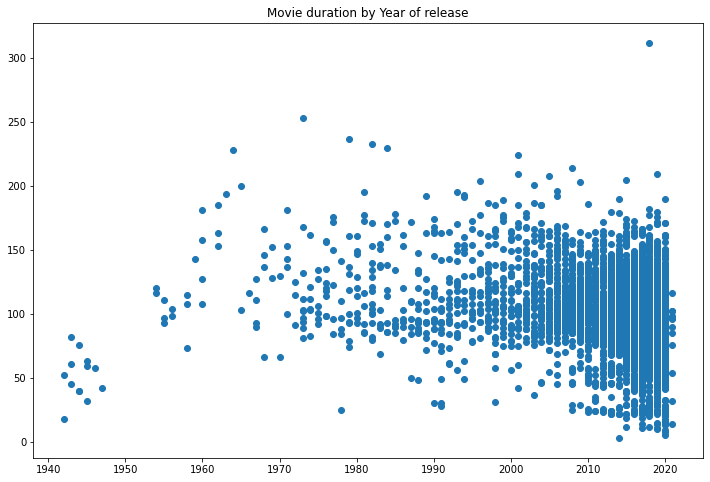

In [14]:
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies['release_year'],netflix_movies['duration'])
plt.title("Movie duration by Year of release")
plt.show()

In [16]:
# since the plot doesnt give much insight, films of shorter duration are inspected for their genres
short_movies = netflix_movies[netflix_movies.loc[:,'duration']<60]
short_movies.head(15)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


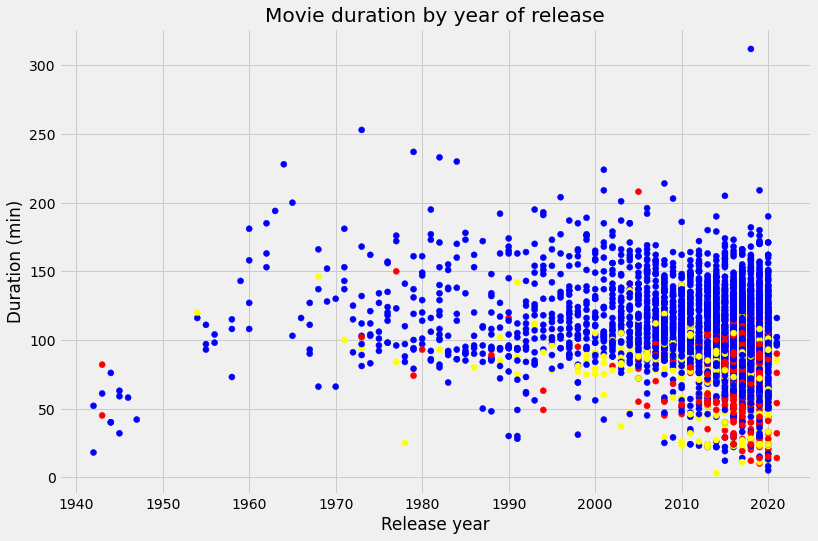

In [17]:
# Color Plotting: 'Children','Standup','Documentaries' which are generally small
colors = []
for label, row in netflix_movies.iterrows():
    if row['genre']=='Children':
        colors.append('yellow')
    elif row['genre']=='Documentaries':
        colors.append('red')
    elif row['genre']=='Standup':
        colors.append('green')
    else:
        colors.append('blue')
        
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies['release_year'],netflix_movies['duration'],c=colors)
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

plt.show()


##### Conclusion: Movies are not certainly getting shorter, ony some percentage of them are